In [1]:
import numpy as np
import random
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten

In [2]:
!pip install matplotlib

Defaulting to user installation because normal site-packages is not writeable


In [4]:
X_train = np.loadtxt(r"C:\Users\Admin\OneDrive\Tài liệu\dataset\Image Classification CNN Keras Dataset\input.csv", delimiter = ',')
Y_train = np.loadtxt(r"C:\Users\Admin\OneDrive\Tài liệu\dataset\Image Classification CNN Keras Dataset\labels.csv", delimiter = ',')

X_test = np.loadtxt(r"C:\Users\Admin\OneDrive\Tài liệu\dataset\Image Classification CNN Keras Dataset\input_test.csv", delimiter = ',')
Y_test = np.loadtxt(r"C:\Users\Admin\OneDrive\Tài liệu\dataset\Image Classification CNN Keras Dataset\labels_test.csv", delimiter = ',')

In [5]:
X_train = X_train.reshape(len(X_train), 100, 100, 3)
Y_train = Y_train.reshape(len(Y_train), 1)

X_test = X_test.reshape(len(X_test), 100, 100, 3)
Y_test = Y_test.reshape(len(Y_test), 1)

X_train = X_train/255.0
X_test = X_test/255.0

In [6]:
print("Shape of X_train: ", X_train.shape)
print("Shape of Y_train: ", Y_train.shape)
print("Shape of X_test: ", X_test.shape)
print("Shape of Y_test: ", Y_test.shape)

Shape of X_train:  (2000, 100, 100, 3)
Shape of Y_train:  (2000, 1)
Shape of X_test:  (400, 100, 100, 3)
Shape of Y_test:  (400, 1)


In [7]:
pip install pillow

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


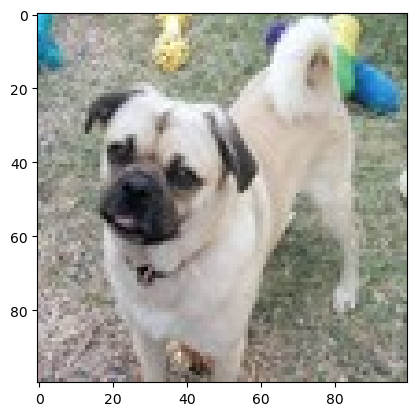

In [8]:
idx = random.randint(0, len(X_train))
plt.imshow(X_train[idx, :])
plt.show()

In [9]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Input

model = Sequential([
    Input(shape=(100, 100, 3)),  # <-- Define input shape here
    Conv2D(32, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    
    Conv2D(32, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    
    Flatten(),
    Dense(64, activation='relu'),
    Dense(1, activation='sigmoid')
])


In [10]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Input

model = Sequential()

# ✅ Define input shape here
model.add(Input(shape=(100, 100, 3)))

# Now add convolutional layers without input_shape
model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))

model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(1, activation='sigmoid')) 

In [11]:
model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

In [12]:
model.fit(X_train, Y_train, epochs = 5, batch_size = 64)

Epoch 1/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 7s 169ms/step - accuracy: 0.4919 - loss: 0.7119
Epoch 2/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 6s 172ms/step - accuracy: 0.5735 - loss: 0.6782
Epoch 3/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 6s 171ms/step - accuracy: 0.6726 - loss: 0.6071
Epoch 4/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 6s 172ms/step - accuracy: 0.7027 - loss: 0.5882
Epoch 5/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 5s 170ms/step - accuracy: 0.7895 - loss: 0.4673


In [13]:
model.evaluate(X_test, Y_test)

13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - accuracy: 0.5975 - loss: 0.7663


[0.641323983669281, 0.6825000047683716]

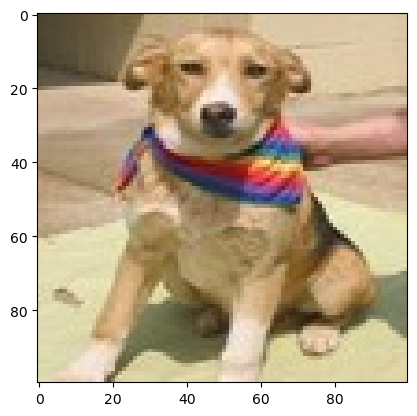

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step
Our model says it is a : cat


In [14]:
idx2 = random.randint(0, len(Y_test))
plt.imshow(X_test[idx2, :])
plt.show()

y_pred = model.predict(X_test[idx2, :].reshape(1, 100, 100, 3))
y_pred = y_pred > 0.5

if(y_pred == 0):
    pred = 'dog'
else:
    pred = 'cat'
    
print("Our model says it is a :", pred)